#  Stacks and Queues

### Stacks: Stack is a container of objects that are inserted and removed according to the last-in first-out (LIFO) principle


### Queues: Queue is a container of objects (a linear collection) that are inserted and removed according to the first-in first-out (FIFO) principle


#### Eaxmples: Plates - Stacks and people row - Queues
##### The collection of plates placed one over the other is a real-world example of a stack, whereas people standing in a queue to pay an electricity bill is a real-world example of the queue.
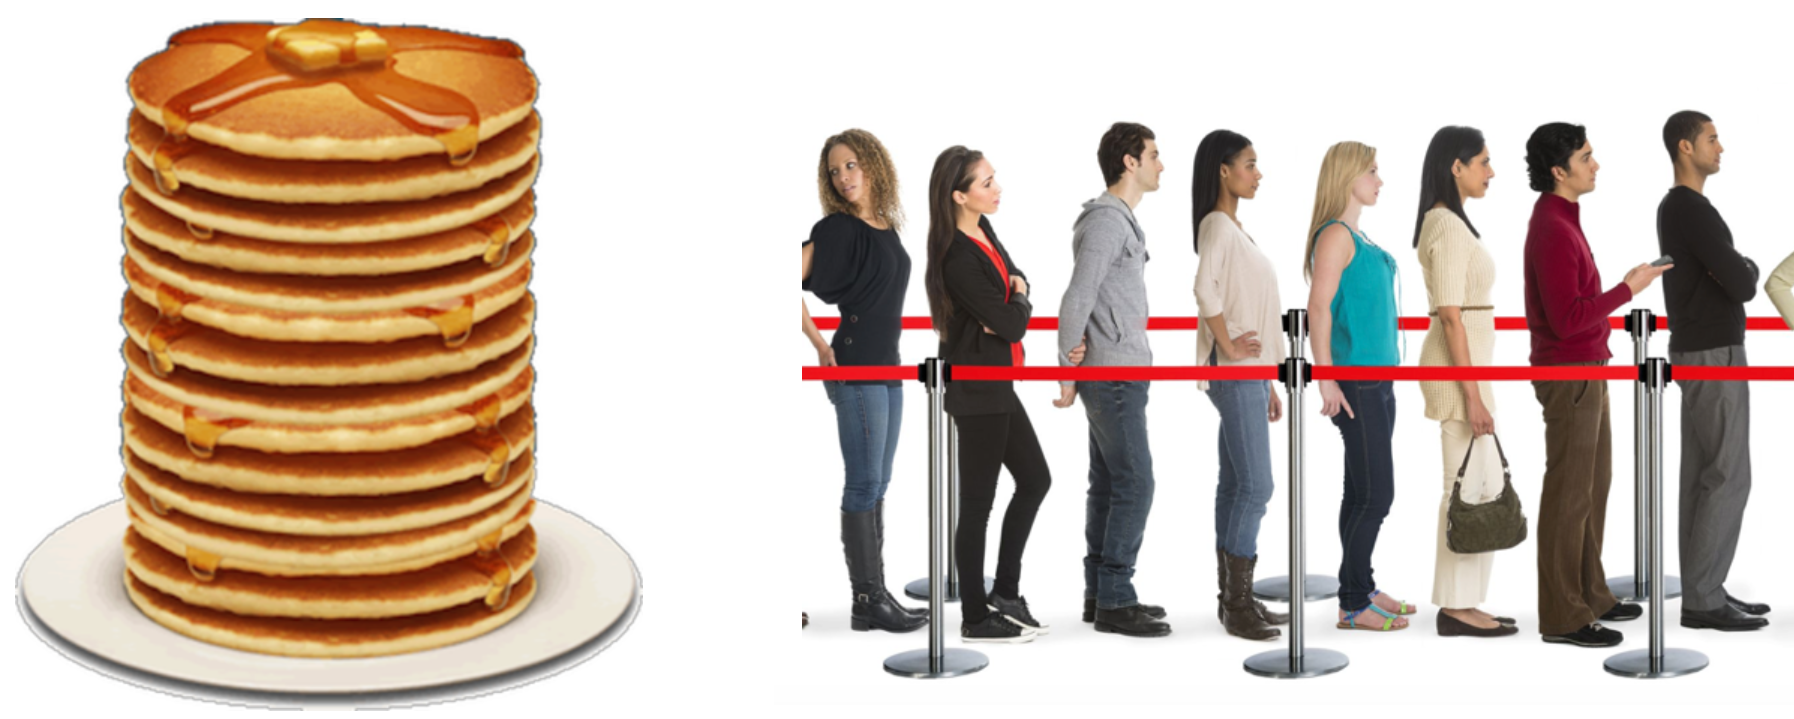

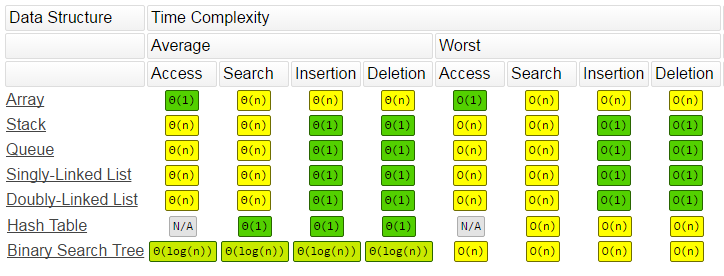

# What is Deque - Doubly ended queue

#### A deque is a double-ended queue in which elements can be both inserted and deleted from either the left or the right end of the queue.

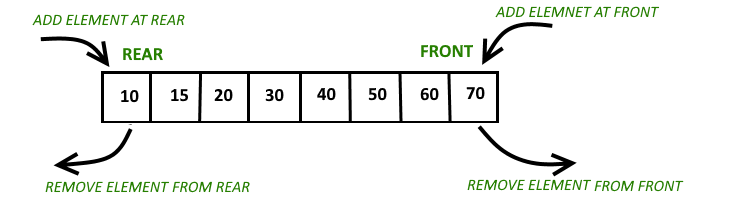



# Basic Implementation of stacks and Queues

In [1]:
# A simple class stack that only allows pop and push operations
class Stack:

    def __init__(self):
        self.stack = []

    def pop(self):
        if len(self.stack) < 1:
            return None
        
        return self.stack.pop()

    def push(self, item):
        self.stack.append(item)

    def size(self):
        return len(self.stack)

# And a queue that only has enqueue and dequeue operations
class Queue:

    def __init__(self):
        self.queue = []

    def enqueue(self, item):
        self.queue.append(item)

    def dequeue(self):
        if len(self.queue) < 1:
            return None
        
        return self.queue.pop(0)

    def size(self):
        return len(self.queue) 

In [2]:
from collections import deque
queue = deque([1, 2, 4, 5, 6])
queue.popleft(), queue

(1, deque([2, 4, 5, 6]))

# Delete an element from the middle of an stack

In [3]:
class Solution:
    
    #Function to delete middle element of a stack.
    def deleteMid(self, s, sizeOfStack):
        # code here
        
        if len(s) == 1:
            s.pop()
            return s
        
        
        n = sizeOfStack
            
        ele = (n-1)//2
        
        for i in range(ele, n-1):
            s[i], s[i+1] = s[i+1], s[i]
        
        s.pop()
        
        return s

# Parenthesis Checker
Given an expression string x. Examine whether the pairs and the orders of {,},(,),[,] are correct in exp.
For example, the function should return 'true' for exp = [()]{}{[()()]()} and 'false' for exp = [(]).

Note: The drive code prints "balanced" if function return true, otherwise it prints "not balanced".

In [4]:

class Solution:
    
    #Function to check if brackets are balanced or not.
    def ispar(self,x):
        # code here
        stack = []
        
        for item in x:
            
            if stack:
                
                if (stack[-1] == '(' and item == ')') or (stack[-1] == '{' and item == '}') or (stack[-1] == '[' and item == ']'):
                    stack.pop()
                
                else:
                    
                    stack.append(item)
            
            else:
                
                stack.append(item)
        
        
        if len(stack) > 0 :
            return False
        
        return True

# Reverse a string using stack
You are given a string S, the task is to reverse the string using stack.



In [5]:
def reverse(S):
    
    stack = []
    
    for item in S:
        
        stack.append(item)
    
    S = ''
    
    while stack:
        
        S += stack.pop()
    
    return S

# Next Greater Element
Given an array arr[ ] of size N having elements, the task is to find the next greater element for each element of the array in order of their appearance in the array.
Next greater element of an element in the array is the nearest element on the right which is greater than the current element.
If there does not exist next greater of current element, then next greater element for current element is -1. For example, next greater of the last element is always -1.

In [6]:
class Solution:
    def nextLargerElement(self,arr,n):
        #code here
        #ans = [-1 for _ in range(n)]
        stack = [arr[-1]]
        arr[-1] = -1
        
        for i in range(n-2, -1, -1):
            val = arr[i]
            while stack and stack[-1] <= arr[i] :
                stack.pop()
            
            if stack and stack[-1] > arr[i] :
                arr[i] = stack[-1]
            
            
            elif not stack:
                arr[i] = -1
            
            stack.append(val)   
            
        return arr

# The celebrity Problem

A celebrity is a person who is known to all but does not know anyone at a party. If you go to a party of N people, find if there is a celebrity in the party or not.
A square NxN matrix M[][] is used to represent people at the party such that if an element of row i and column j  is set to 1 it means ith person knows jth person. Here M[i][i] will always be 0.
Note: Follow 0 based indexing.
Follow Up: Can you optimize it to O(N)

In [7]:
# First TLE and Brute Force Approach
class Solution:
    
    #Function to find if there is a celebrity in the party or not.
    def celebrity(self, M, n):
        # code here 
        
        map1 = {}
        
        for i in range(n):
            for j in range(n):
                
                if M[i][j] == 1 :
                    
                    if j not in map1:
                        map1[j] = [i]
                    
                    else:
                        map1[j] += [i]
        
        for item in map1.keys():
            
            if len(map1[item]) == n-1 and sum(M[item]) == 0:
                
                return item
        
        return -1
            
# Little Optimized and Brute Force Approach
class Solution:
    
    #Function to find if there is a celebrity in the party or not.
    def celebrity(self, M, n):
        # code here 
        
        for col in range(n):
            
            count = 0
            
            for i in range(n):
                
                if M[i][col] == 1 :
                    count += 1
                
                elif i != col and M[i][col] == 0:
                    
                    break
                
            if count != n-1 :
                continue
            
            else:
                
                sum1 = 0
                for item in M[col]:
                    sum1 += item
                    if item == 1 :
                        break
                    
            if sum1 == 0 and count == n-1:
                
                return col
                    
        return -1

# Optimized Approach
class Solution:
    
    #Function to find if there is a celebrity in the party or not.
    def celebrity(self, M, n):
        # code here
        stack = [i for i in range(n)]
        while len(stack)>1:
            a = stack.pop()
            b = stack.pop()
            if M[a][b]==0 and M[b][a]==1:
                stack.append(a)
            elif M[b][a]==0 and M[a][b]==1:
                stack.append(b)
        if not stack:
            return -1
        count=0
        for i in range(n):
            if M[stack[0]][i]!=0:
                return -1
            if M[i][stack[0]]==0:
                count+=1
                if count>1:
                    return -1
        return stack[0]            


# Prefix to Infix Conversion
You are given a string S of size N that represents the prefix form of a valid mathematical expression. Convert it to its infix form.
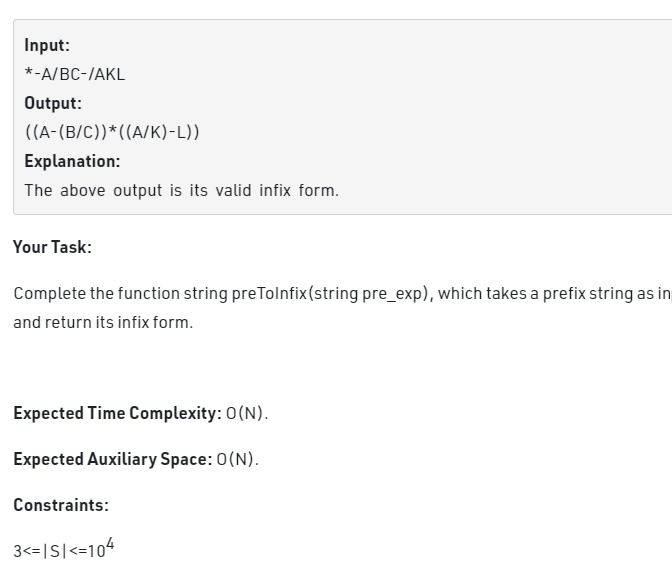


In [8]:
class Solution:
    def preToInfix(self, pre_exp):
        # Create a set containing the operators: +, -, *, /
        set1 = set(['/', '-', '*', '+'])
        
        # Create an empty stack to store operands and sub-expressions
        stack = []
        
        # Get the length of the input prefix expression
        n = len(pre_exp)
        i = n - 1
        
        # Iterate through the characters in reverse order
        while i >= 0:
            
            # If the current character is an operator
            if pre_exp[i] in set1:
                # Pop the last two items from the stack as operands
                x = stack.pop()
                y = stack.pop()
                
                # Combine the operands and the operator in parentheses and push it back to the stack
                stack.append('(' + x + pre_exp[i] + y + ')')
            
            else:
                # If the current character is an operand, push it onto the stack
                stack.append(pre_exp[i])
            
            # Move to the previous character
            i -= 1
        
        # The final result will be the first (and only) element left in the stack
        return stack[0]


# Insert an element at the bottom of a stack

You are given a stack St of N integers and an element X. You have to insert X at the bottom of the given stack.

In [9]:
class Solution:
    def insertAtBottom(self,St,X):
        # code here
        
        St.append(X)
        n = len(St)
        
        i = n-1
        while i > 0 :
            
            St[i], St[i-1] = St[i-1], St[i]
            
            i -= 1
        
        return St

# Reverse a stack
You are given a stack St. You have to reverse the stack using recursion.



In [10]:
from typing import List

class Solution:
    def reverse(self, St):
        # Get the length of the stack
        n = len(St)
        
        # Call the recursive helper function to reverse the stack
        self.rev(0, n - 1, St)
        
        # The stack is now reversed, so return it
        return St
        
    def rev(self, i, j, St):
        # Base case: if i is greater than or equal to j, stop recursion
        if i >= j:
            return 
        
        # Swap the elements at positions i and j in the stack
        St[i], St[j] = St[j], St[i]
        
        # If the difference between i and j is 1, it means we have reversed all elements
        if abs(i - j) == 1:
            return 
        
        # Recursively reverse the elements between i+1 and j-1
        self.rev(i + 1, j - 1, St)


# Sort a stack
Given a stack, the task is to sort it such that the top of the stack has the greatest element.



In [11]:
class Solution:
    # your task is to complete this function
    # function sort the stack such that top element is max
    # funciton should return nothing
    # s is a stack
    def Sorted(self, s):
        # Code here
        
        s = [item for item in self.mrgsort(s)]
        
    def mrgsort(self, arr):
        
        if len(arr) == 0 :
            return
        
        if len(arr) == 1:
            return arr
        
        if len(arr) == 2 :
            
            if arr[0] > arr[1] :
                arr[0], arr[1] = arr[1], arr[0]
            
            return arr
        
        else:
            n = len(arr)
            h = (n)//2
            
            a = self.mrgsort(arr[:h])
            b = self.mrgsort(arr[h:])
            
            i = 0
            j = 0
            k = 0
            
            while j < len(a) and k < len(b):
                
                if a[j] < b[k] :
                    arr[i] = a[j]
                    
                    j += 1
                    
                else:
                    arr[i] = b[k]
                    
                    k += 1
                
                i += 1

            while j < len(a):
                
                arr[i] = a[j]
                
                j += 1
                i += 1
                
            while k < len(b):
                
                arr[i] = b[k]
                k += 1
                i += 1
            
        return arr

# Overlapping Intervals
Given a collection of Intervals, the task is to merge all of the overlapping Intervals.

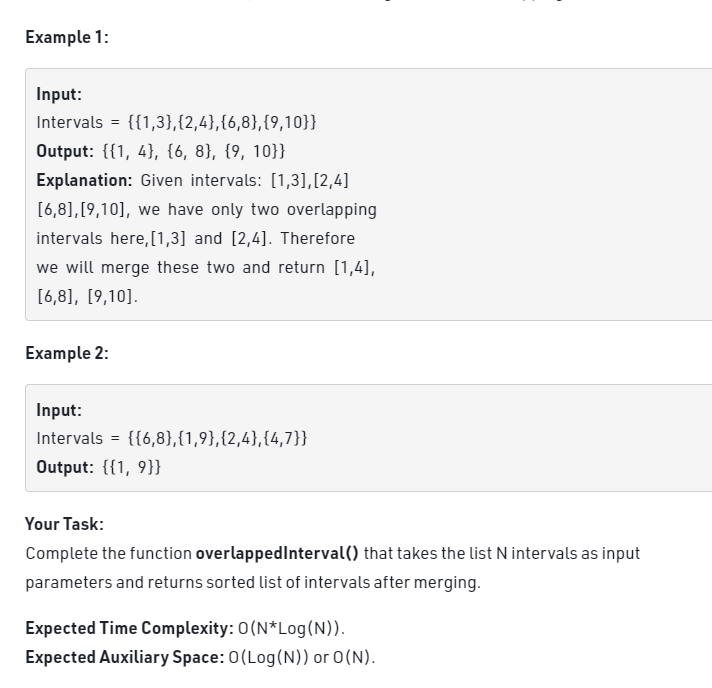

In [12]:
# Using Stack Approach

class Solution:
    def overlappedInterval(self, Intervals):
        # Sort the intervals based on their start times
        Intervals.sort()
        
        # Create a stack to store merged intervals
        stack = [Intervals[0]]
        
        # Get the total number of intervals
        n = len(Intervals)
        i = 1
        
        # Iterate through the sorted intervals
        while i < n:
            # Check if the current interval (Intervals[i]) starts after the end of the top interval in the stack
            if stack[-1][1] < Intervals[i][0]:
                # If they don't overlap, add the current interval to the stack
                stack.append(Intervals[i])
            else:
                # If they overlap, merge the current interval with the top interval in the stack
                if stack and Intervals[i][1] > stack[-1][1]: # Interval[i] doesn,t completely lie inside stack[-1] interval
                    x = stack.pop()  # Remove the top interval from the stack
                    # Add a new merged interval with the start of the top interval and the end of the current interval
                    stack.append([x[0], Intervals[i][1]])
            
            i += 1
        
        # After processing all intervals, the stack contains the merged intervals
        return stack


In [13]:
# Using Basics of array
class Solution:
    def overlappedInterval(self, Intervals):
        # Sort the intervals based on their start times
        Intervals.sort()
        
        # Initialize an index (idx) to keep track of the current merged interval
        idx = 0
        
        # Get the total number of intervals
        n = len(Intervals)
        
        # Iterate through the sorted intervals starting from the second interval
        for i in range(1, n):
            # Check if the current interval overlaps with the current merged interval (Intervals[idx])
            if Intervals[idx][1] >= Intervals[i][0]:
                # If they overlap, update the end time of the current merged interval to the maximum of the two end times
                Intervals[idx][1] = max(Intervals[idx][1], Intervals[i][1])
            else:
                # If they don't overlap, move to the next merged interval and copy the current interval to it
                idx += 1
                Intervals[idx] = Intervals[i]
        
        # The intervals up to idx represent the merged intervals, so return them as the result
        return Intervals[:idx+1]


# Maximum Rectangular area in a histogram
Find the largest rectangular area possible in a given histogram where the largest rectangle can be made of a number of contiguous bars. For simplicity, assume that all bars have the same width and the width is 1 unit, there will be N bars height of each bar will be given by the array arr.

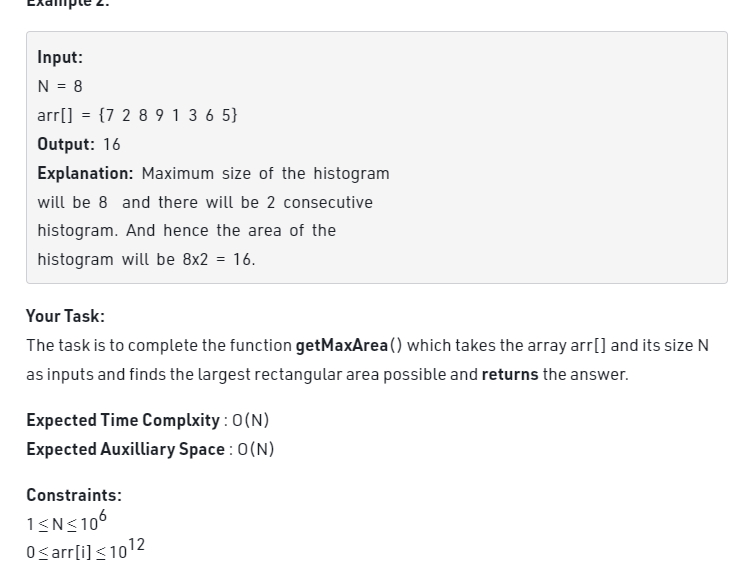


In [14]:
class Solution:
    def getMaxArea(self, histogram):
        max_area = 0           # Initialize the maximum area to 0
        stack = []             # Create an empty stack to store indices
        
        histogram.append(0)    # Append a sentinel value of 0 to ensure all bars are processed
        
        n = len(histogram)
        
        # Iterate through each bar in the histogram
        for i in range(n):
            while stack and histogram[i] < histogram[stack[-1]]:
                # While the current bar is shorter than the bar at the top of the stack
                height = histogram[stack.pop()]  # Pop the index and get its height
                
                if stack:
                    width = i    # Calculate the width
                
                else:
                    width = i - stack[-1] - 1  # Calculate the width
                max_area = max(max_area, height * width)  # Calculate the area and update max_area
            
            stack.append(i)  # Push the current bar's index onto the stack
        
        return max_area  # Return the maximum area found

# Valid Substring
Given a string S consisting only of opening and closing parenthesis 'ie '('  and ')', find out the length of the longest valid(well-formed) parentheses substring.
NOTE: Length of the smallest valid substring ( ) is 2.

In [15]:
class Solution:
    def findMaxLen(self, S):
        stack = []  # Create an empty stack to store the indices of opening parentheses
        n = len(S)
        
        # If the string is empty or has only one character, there can't be a valid substring, so return 0.
        if n <= 1:
            return 0
        
        for i in range(n):
            if stack and S[i] == ')' and S[stack[-1]] == '(':
                # If the current character is a closing parenthesis and the character at the top of the stack is an opening parenthesis, they form a valid pair.
                # Pop the index of the opening parenthesis from the stack.
                stack.pop()
            else:
                # Otherwise, push the current index onto the stack.
                stack.append(i)
        
        end = n  # Initialize the end variable to the length of the string.
        ans = -999999  # Initialize ans to a very small negative value.
        
        while stack:
            ele = stack.pop()  # Pop the index of the unmatched opening parenthesis.
            ans = max(ans, end - ele - 1)  # Calculate the length of the valid substring ending at the unmatched opening parenthesis.
            end = ele  # Update the end to the index of the unmatched opening parenthesis.
        
        # The maximum valid substring length could be between the start of the string and the last unmatched opening parenthesis.
        return max(ans, end)


# Expression contains redundant brackets or not
Given a string of balanced expression, find if it contains a redundant parenthesis or not. A set of parenthesis are redundant if the same sub-expression is surrounded by unnecessary or multiple brackets. Print Yes if redundant, else No.
Note: Expression may contain + , - , *, and / operators. Given expression is valid and there are no white spaces present.

In [16]:
class Solution():
    
    def checkRedundancy(self, s):
        # Get the length of the input string
        n = len(s)
        
        # Initialize two stacks
        stack1 = []  # For storing opening parentheses positions
        stack2 = []  # For storing pairs of positions corresponding to redundant parentheses
        
        # Iterate through the input string
        for i in range(n):
            if s[i] == '(':  # If an opening parenthesis is encountered
                stack1.append(i)  # Push its position onto stack1
            
            elif s[i] == ')':  # If a closing parenthesis is encountered
                x = stack1.pop()  # Pop the position of the matching opening parenthesis
                
                # Store the pair of positions (opening and closing) on stack2
                stack2.append([x, i])
        
        # Iterate through the pairs of positions on stack2
        for i in range(len(stack2) - 1):
            x1 = stack2[i]
            x2 = stack2[i + 1]
            
            # Check if the distance between opening and closing parentheses is less than or equal to 2
            if x1[1] - x1[0] <= 2:
                return "Yes"  # Redundant parentheses found, return "Yes"
            
            # Check if the two pairs are adjacent with no expression in between
            elif (abs(x2[0] - x1[0]) == 1) and (abs(x2[1] - x1[1]) == 1):
                return "Yes"  # Redundant parentheses found, return "Yes"
        
        # Check the last pair of positions on stack2
        if stack2[-1][1] - stack2[-1][0] <= 2:
            return "Yes"  # Redundant parentheses found, return "Yes"
        
        return "No"  # No redundant parentheses found, return "No"


# Reduandent parentheis
Given a valid expression containing only binary operators '+', '-', '*', '/' and operands, remove all the redundant parenthesis.

A set of parenthesis is said to be redundant if, removing them, does not change the value of the expression.

Note: The operators '+' and '-' have the same priority. '*' and '/' also have the same priority. '*' and '/' have more priority than '+' and '-'.

In [17]:
from collections import defaultdict

class Solution:
    def removeBrackets(self, s: str) -> str:
        c = list(s)  # Convert the input string into a list of characters
        n = len(c)   # Get the length of the character list

        p = [float('inf')] * n  # Initialize a list to store the priority of operators at each position
        mark = [0] * n         # Initialize a list to mark positions for removal

        prior = defaultdict(int)
        prior['/'] = 1
        prior['*'] = 1
        prior['-'] = 0
        prior['+'] = 0
        prior['('] = 2  # Define operator priorities

        num = []  # Initialize a list to store operands
        op = []   # Initialize a list to store operators
        par = []  # Initialize a list to store parentheses positions

        i = 0
        while i < n:
            if c[i] != ')' and c[i] not in prior:
                num.append(str(c[i]))  # If the character is not an operator or ')', add it to the operand list
            else:
                if c[i] == ')':
                    while c[op[-1]] != '(':
                        Operator = c[op.pop()]  # Pop operators until an opening parenthesis is found
                        operand1 = num.pop()    # Pop operands
                        operand2 = num.pop()

                        res = operand1 + Operator + operand2  # Create a new expression
                        p[par[-1]] = min(p[par[-1]], prior[Operator])  # Update operator priority

                        num.append(res)

                    op.pop()  # Pop the opening parenthesis

                    # Check for conditions to mark redundant parentheses
                    use = False
                    if (i+1 < n and c[i+1] in prior and prior[c[i+1]] > p[par[-1]]) or (op and c[op[-1]] != '(' and prior[c[op[-1]]] > p[par[-1]]):
                        mark[par[-1]] += 1  # Mark the current and enclosing parentheses
                        mark[i] += 1
                        use = True

                    check1 = '~' if i+1 >= n else c[i+1]
                    check2 = '~' if not op else c[op[-1]]
                    if (check1 == '-' or check2 == '-') and p[par[-1]] == 0:
                        mark[par[-1]] += 1  # Mark for '-' operator
                        mark[i] += 1
                        use = True

                    check1 = '~' if i+1 >= n else c[i+1]
                    check2 = '~' if not op else c[op[-1]]
                    if (check1 == '/' or check2 == '/') and p[par[-1]] == 1:
                        mark[par[-1]] += 1  # Mark for '/' operator
                        mark[i] += 1
                        use = True

                    if op:
                        if c[op[-1]] == '(':
                            p[op[-1]] = p[par[-1]]  # Set the priority of the opening parenthesis
                    par.pop()  # Pop the position of the enclosing parenthesis
                else:
                    if c[i] == '(':
                        op.append(i)
                        par.append(i)  # Push the position of the opening parenthesis
                    else:
                        if not op or prior[c[i]] > prior[c[op[-1]]] or c[op[-1]] == '(':
                            op.append(i)  # Push the current operator
                        else:
                            Operator = c[op.pop()]  # Pop the higher priority operator
                            operand1 = num.pop()
                            operand2 = num.pop()

                            res = operand1 + Operator + operand2  # Create a new expression

                            num.append(res)
                            i -= 1  # Decrement i to re-evaluate the current character
            i += 1

        # Process the remaining operators and operands
        while op:
            Operator = c[op.pop()]
            operand1 = num.pop()
            operand2 = num.pop()

            res = operand1 + Operator + operand2  # Create a new expression

            num.append(res)

        ans = ""

        # Construct the final expression with redundant parentheses removed
        for i in range(n):
            if mark[i] != 0 and (c[i] == '(' or c[i] == ')'):
                ans += c[i]  # Add marked parentheses to the result
            elif c[i] != '(' and c[i] != ')':
                ans += c[i]  # Add non-parentheses characters to the result

        return ans  # Return the expression with redundant parentheses removed


# Stack Permutations
You are given two arrays A and B of unique elements of size N. Check if array B is a stack permutation of the array A or not.
Stack permutation means that array B can be created from array A using a stack and stack operations.

In [18]:
from typing import List

class Solution:
    def isStackPermutation(self, N: int, A: List[int], B: List[int]) -> int:
        # Initialize an index 'j' to keep track of the current index in array B.
        j = 0

        # Create an empty stack to simulate stack operations.
        stack = []

        # Get the lengths of arrays A and B.
        n1 = len(A)
        n2 = len(B)

        # Iterate through the elements of array A.
        for i in range(n1):
            # Push the current element from array A onto the stack.
            stack.append(A[i])

            # While the stack is not empty, the current index 'j' is within the bounds of array B,
            # and the top element of the stack is equal to the element at index 'j' in array B:
            while stack and j < n2 and stack[-1] == B[j]:
                # Pop the top element from the stack.
                stack.pop()
                # Increment 'j' to check the next element in array B.
                j += 1

        # After the loop, if the stack is empty, it means that array B can be obtained from array A
        # using stack operations, so return 1 to indicate a valid stack permutation.
        if not stack:
            return 1

        # If the stack is not empty, return 0 to indicate that B is not a stack permutation of A.
        return 0


# -------Circular Queue-------

##### A Circular Queue is an extended version of a normal queue where the last element of the queue is connected to the first element of the queue forming a circle.

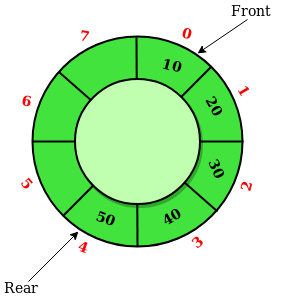

##### illustration of Enqueue and Dequeue operations on circular queue




![image-4.png](https://i0.wp.com/pediaa.com/wp-content/uploads/2019/01/Difference-Between-Linear-and-Circular-Queue_Figure-2.gif?resize=550%2C400)



In [19]:
class CircularQueue():

    # constructor
    def __init__(self, size): # initializing the class
        self.size = size

        # initializing queue with none
        self.queue = [None for i in range(size)]
        self.front = self.rear = -1

    def enqueue(self, data):

        # condition if queue is full
        if ((self.rear + 1) % self.size == self.front):
            print(" Queue is Full\n")

        # condition for empty queue
        elif (self.front == -1):
            self.front = 0
            self.rear = 0
            self.queue[self.rear] = data
            
        else:

            # next position of rear
            self.rear = (self.rear + 1) % self.size
            self.queue[self.rear] = data

    def dequeue(self):
        if (self.front == -1): # condition for empty queue
            print ("Queue is Empty\n")

        # condition for only one element
        elif (self.front == self.rear):
            temp=self.queue[self.front]
            self.front = -1
            self.rear = -1
            return temp
        else:
            temp = self.queue[self.front]
            self.front = (self.front + 1) % self.size
            return temp

    def display(self):

        # condition for empty queue
        if(self.front == -1):
            print ("Queue is Empty")

        elif (self.rear >= self.front):
            print("Elements in the circular queue are:",
                                            end = " ")
            for i in range(self.front, self.rear + 1):
                print(self.queue[i], end = " ")
            print ()

        else:
            print ("Elements in Circular Queue are:",
                                        end = " ")
            for i in range(self.front, self.size):
                print(self.queue[i], end = " ")
            for i in range(0, self.rear + 1):
                print(self.queue[i], end = " ")
            print ()

        if ((self.rear + 1) % self.size == self.front):
            print("Queue is Full")

# Driver Code
ob = CircularQueue(5)
ob.enqueue(14)
ob.enqueue(22)
ob.enqueue(13)
ob.enqueue(-6)
ob.display()
print ("Deleted value = ", ob.dequeue())
print ("Deleted value = ", ob.dequeue())
ob.display()
ob.enqueue(9)
ob.enqueue(20)
ob.enqueue(5)
ob.display()

Elements in the circular queue are: 14 22 13 -6 
Deleted value =  14
Deleted value =  22
Elements in the circular queue are: 13 -6 
Elements in Circular Queue are: 13 -6 9 20 5 
Queue is Full


In [20]:

class Cqueue:
    
    def __init__(self, size):
        
        self.queue = [None for _ in range(size)]
        self.first = -1
        self.last = -1
        self.size = size
    
    
    def enqueue(self, val):
        
        if self.last + 1 == self.first:
            
            print('queue is full and can"t perform this operation')
        
        elif self.first == -1 :
            
            self.first = 0
            self.last = 0
            self.queue[self.first] = val
        
        else:
            
            self.last = (self.last + 1)%self.size
            
            self.queue[self.last] = val
        
    def dequeue(self):
        
        if self.first == -1 :
            print("Sorry the queue is empty and not able to perform this operation")
        
        elif self.first == self.last:
            
            x = self.queue[self.first]
            self.first = -1
            self.last = -1
            
            return x
        
        
        
        else:
            
            x = self.queue[self.first]
            self.queue[self.first] = None
            self.first  =   (self.first + 1)%self.size
            
            return x
    
    
    def display(self):
        
        if self.first == -1 :
            
            print('this queue is empty')
        
        elif self.last >= self.first:
            
            i = self.first
            
            for i in range(self.first, self.last + 1):
                
                print(self.queue[i], end = " ")
            
            print()
            
        else:
            
            i  = self.first 
            
            for i in range(self.first, self.size):
                
                print(self.queue[i], end = " ")
            
            
            for i in range(0, self.last + 1):
                
                print(self.queue[i], end = " ")
            print()
        
        return 



In [21]:
# Driver Code
ob = Cqueue(5)
ob.enqueue(14)
ob.enqueue(22)
ob.enqueue(13)
ob.enqueue(-6)
ob.display()
print ("Deleted value = ", ob.dequeue())
print ("Deleted value = ", ob.dequeue())
ob.display()
ob.enqueue(9)
ob.enqueue(20)
ob.enqueue(5)
ob.display()

14 22 13 -6 
Deleted value =  14
Deleted value =  22
13 -6 
13 -6 9 20 5 


# Reverse a queue using recursion
Given a Queue Q containing N elements. The task is to reverse the Queue. Your task is to complete the function rev(), that reverses the N elements of the queue.

In [22]:
class Solution:
    
    def rev(self, queue):
        
        if len(queue) == 0 :
            return
        
        else:
            
            first = queue[0]
            queue.pop(0)
            
            self.rev(queue)
            queue.append(first)
        
        return queue

# Reverse first K elements of a Queue
Given an integer K and a queue of integers, we need to reverse the order of the first K elements of the queue, leaving the other elements in the same relative order.

Only following standard operations are allowed on queue.

enqueue(x) : Add an item x to rear of queue
dequeue() : Remove an item from front of queue
size() : Returns number of elements in queue.
front() : Finds front item.
Note: The above operations represent the general processings. In-built functions of the respective languages can be used to solve the problem.

In [23]:
#Function to reverse first k elements of a queue.
def modifyQueue(q,k):
    # code here
    
    if k == 1 and len(q) > 0:
        return q
        
    n = len(q)
    stack = []
    
    if k > n:
        k = k % n
    
    for i in range(k):
        x = q.pop(0)
        stack += [x]
        
    
    for i in range(k-1, -1, -1):
        
        q.append(stack[i])
    
    i = 0
    
    while i < n-k :
        
        x = q.pop(0)
        
        q.append(x)
        
        i += 1
    
    return q

# Interleave the First half of the queue with the second half
You are given a queue Q of N integers of even length, rearrange the elements by interleaving the first half of the queue with the second half of the queue.


In [24]:
from typing import List


class Solution:
    def rearrangeQueue(self, N : int, q : List[int]) -> List[int]:
        # code here
        
        idx2 = N//2
        
        stack = []
        
        idx1 = 0
        
        while idx1 < N//2 and idx2 < N :
            
            stack += [q[idx1]]
            stack += [q[idx2]]
            
            idx1 += 1
            idx2 += 1
        
        return stack

# Circular Tour

Suppose there is a circle. There are N petrol pumps on that circle. You will be given two sets of data.
1. The amount of petrol that every petrol pump has.
2. Distance from that petrol pump to the next petrol pump.
Find a starting point where the truck can start to get through the complete circle without exhausting its petrol in between.
Note :  Assume for 1 litre petrol, the truck can go 1 unit of distance.

In [25]:
class Solution:
    
    # Function to find the starting point where the truck can start to get through
    # the complete circle without exhausting its petrol in between.
    def tour(self, lis, n):
        if n == 1:
            return -1  # If there's only one petrol pump, it's not possible to complete the circle
        
        sum1 = 0
        
        # Calculate the difference between petrol and distance for each petrol pump
        for i in range(n):
            lis[i][0] = lis[i][0] - lis[i][1]  # Update the petrol value to represent the net petrol available
            sum1 += lis[i][0]  # Calculate the total net petrol available
        
        if sum1 < 0:
            return -1  # If the total net petrol available is negative, there is no possible starting point
        
        stack = []
        balance = 0
        first = 0
        last = 0
        i = 0
        
        while first < n and i < n:
            if balance < 0:
                first = i
                last  = i
                balance = lis[i][0]  # Reset the starting point and balance when it becomes negative
            else:
                balance += lis[i][0]  # Add the net petrol at the current pump to the balance
            i += 1
        
        return first  # Return the starting point where the truck can start and complete the circle


# Rotten Oranges  ---- VVVV imp
Given a grid of dimension nxm where each cell in the grid can have values 0, 1 or 2 which has the following meaning:
0 : Empty cell
1 : Cells have fresh oranges
2 : Cells have rotten oranges

We have to determine what is the minimum time required to rot all oranges. A rotten orange at index [i,j] can rot other fresh orange at indexes [i-1,j], [i+1,j], [i,j-1], [i,j+1] (up, down, left and right) in unit time. 
 

In [26]:



class Solution:

    # Function to find the minimum time required to rot all oranges.
    def orangesRotting(self, grid):
        n = len(grid)  # Get the number of rows in the grid
        m = len(grid[0])  # Get the number of columns in the grid

        if n == 1 and m == 1:
            return 0  # If there's only one cell, no time is needed
        
        tab = [[0 for _ in range(m)] for _ in range(n)]  # Initialize a table to store the time taken for each cell
        visited = [[False for _ in range(m)] for _ in range(n)]  # Initialize a table to keep track of visited cells
        mins = -99999999  # Initialize a variable to store the maximum time taken
        
        for i in range(n):
            for j in range(m):
                
                # if fresh orange is found
                if grid[i][j] == 1:
                    tab[i][j] = self.solver(grid, i, j, visited)  # Calculate the time to rot the fresh orange
                    
                    if tab[i][j] == float('inf'):
                        return -1  # If any fresh orange cannot be reached, return -1
                    
                    mins = max(mins, tab[i][j])  # Update the maximum time taken
        
        if mins == -99999999:
            return 0  # If there are no fresh oranges, return 0
        
        return mins  # Return the maximum time taken to rot all oranges
    
    def solver(self, grid, i, j, visited):
        n = len(grid)
        m = len(grid[0])
        
        if i < 0 or j < 0 or i >= n or j >= m or visited[i][j] == True:
            return float('inf')  # If the cell is out of bounds or already visited, return infinity
        
        visited[i][j] = True
        
        if grid[i][j] == 0:
            visited[i][j] = False
            return float('inf')  # If the cell is empty, return infinity
            
        elif grid[i][j] == 2:
            visited[i][j] = False
            return 0  # If the cell is already rotten, no time is needed
        
        else:
            # Recursively calculate the time required for each adjacent cell
            a = self.solver(grid, i + 1, j, visited)
            b = self.solver(grid, i - 1, j, visited)
            c = self.solver(grid, i, j + 1, visited)
            d = self.solver(grid, i, j - 1, visited)
            
            visited[i][j] = False
            
            # Return the minimum time among the adjacent cells + 1
            return min(a, b, c, d) + 1


# Distance of nearest cell having 
Given a binary grid of n*m. Find the distance of the nearest 1 in the grid for each cell.
The distance is calculated as |i1  - i2| + |j1 - j2|, where i1, j1 are the row number and column number of the current cell, and i2, j2 are the row number and column number of the nearest cell having value 1. There should be atleast one 1 in the grid.

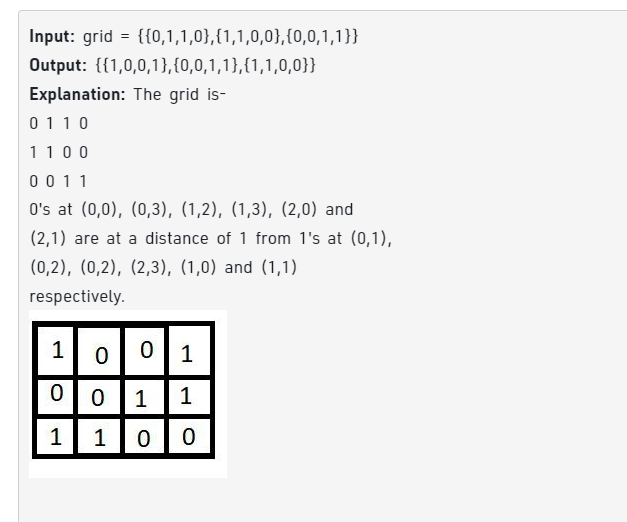

In [27]:
# TLE Approach
class Solution:
    def nearest(self, grid):
        n = len(grid)  # Get the number of rows in the grid
        m = len(grid[0])  # Get the number of columns in the grid
        
        # Create a matrix to store the distances (initialized with zeros)
        tab = [[0 for _ in range(m)] for _ in range(n)]
        
        # Create a matrix to keep track of visited cells (initialized with False)
        visited = [[False for _ in range(m)] for _ in range(n)]
        
        for i in range(n):
            for j in range(m):
                if grid[i][j] != 1:
                    
                    # Call the solver function to calculate the minimum distance to "1"
                    minv, idx1, idx2 = self.solver(grid, visited, i, j, i, j)
                    
                    # Calculate the Manhattan distance to the "1"
                    ans = abs(idx1 - i) + abs(idx2 - j)
                    
                    # Update the distance in the tab matrix
                    tab[i][j] = ans
        
        return tab

    def solver(self, grid, visited, i, j, idx1, idx2):
        n = len(grid)  # Get the number of rows in the grid
        m = len(grid[0])  # Get the number of columns in the grid
        
        # Base cases for recursion
        if i < 0 or j < 0 or i >= n or j >= m or visited[i][j] == True:
            return [float('inf'), float('inf'), float('inf')]  # Return infinity
        
        if grid[i][j] == 1:
            return [1, i, j]  # If the cell is "1", return a distance of 1
        
        else:
            visited[i][j] = True  # Mark the cell as visited
            
            # Recursively explore adjacent cells (up, left, right, and down)
            b = self.solver(grid, visited, i+1, j, idx1, idx2)
            d = self.solver(grid, visited, i, j-1, idx1, idx2)
            e = self.solver(grid, visited, i, j+1, idx1, idx2)
            g = self.solver(grid, visited, i-1, j, idx1, idx2)
            
            visited[i][j] = False  # Unmark the cell
            
            mins = [float('inf'), float('inf'), float('inf')]  # Initialize minimum distance
            
            # Compare and update the minimum distance and indices
            for item in [b, d, e, g]:
                if item[0] <= mins[0] and (abs(item[1] - idx1) + abs(item[2] - idx2)) < (abs(mins[1] - idx1) + abs(mins[2] - idx2)):
                    mins = item
            
            return [mins[0]+1, mins[1], mins[2]]  # Return the minimum distance and corresponding indices


In [28]:
# Optimized Approach
from collections import deque

class Solution:
    # Function to find the distance of the nearest 1 in the grid for each cell.
    def nearest(self, grid):
        n = len(grid)  # Get the number of rows in the grid
        m = len(grid[0])  # Get the number of columns in the grid
        
        vis = []  # Initialize a list to keep track of visited cells
        dist = []  # Initialize a list to store distances
        
        for i in range(n):
            row = [0] * m  # Initialize rows for the visited and distance matrices
            vis.append(row)
            dist.append(row)
            
        queue = deque([])  # Create a queue for BFS
        r = [-1, 0, 1, 0]  # Offsets for rows in the four cardinal directions
        c = [0, 1, 0, -1]  # Offsets for columns in the four cardinal directions
        
        # Initialize the BFS queue with "1" cells
        for i in range(n):
            for j in range(m):
                if grid[i][j] == 1:
                    queue.append([i, j, 0])  # [row, column, distance]
                    vis[i][j] = 1  # Mark the cell as visited
                    dist[i][j] = 0  # Distance to itself is 0
                    
        while len(queue) != 0:
            row, col, d = queue.popleft()
            # Dequeue the cell
            
            # Explore neighbors in all four directions
            for i in range(4):
                nrow = row + r[i]
                ncol = col + c[i]
                
                # Check if the neighbor is within bounds and is an empty cell
                if (nrow >= 0 and nrow < n and ncol >= 0 and ncol < m and grid[nrow][ncol] == 0 and vis[nrow][ncol] == 0):
                    vis[nrow][ncol] = 1  # Mark the neighbor as visited
                    dist[nrow][ncol] = d + 1  # Update the distance
                    queue.append([nrow, ncol, d + 1])  # Enqueue the neighbor for further exploration
                    
        return dist  # Return the matrix containing distances to the nearest "1" for each cell


# Check if all the levels of two binary trees are anagrams or not
Given two binary trees with same number of nodes, the task is to check if each of their levels are anagrams of each other or not. 



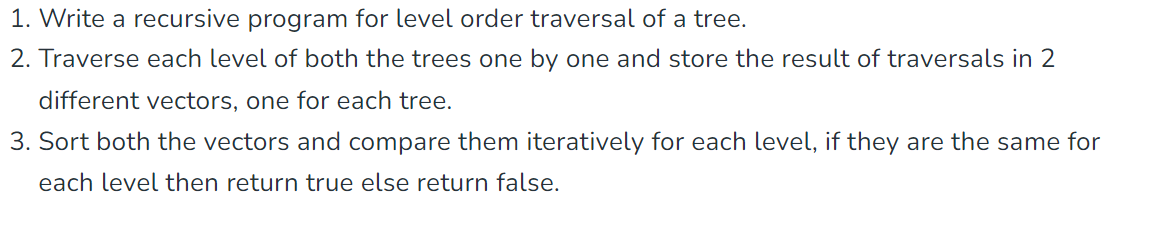

In [29]:
class Solution:
    def areAnagrams(self, node1, node2):
        # Initialize two dictionaries to store values at each level for both trees.
        map1 = {}
        map2 = {}

        # Depth-first traversal for the first tree.
        stack = [(node1, 0)]

        while stack:
            cur, d = stack.pop()

            # If the level 'd' is already in map1, append the current node's data to it.
            if d in map1:
                map1[d].append(cur.data)
            # If the level 'd' is not in map1, create a new list for it.
            else:
                map1[d] = [cur.data]

            # Traverse the left and right children, and update their levels.
            if cur.left:
                stack.append((cur.left, d + 1))
            if cur.right:
                stack.append((cur.right, d + 1))

        # Initialize the second dictionary for the second tree.
        map2 = {}
        stack = [(node2, 0)]

        while stack:
            cur, d = stack.pop()

            # If the level 'd' is already in map2, append the current node's data to it.
            if d in map2:
                map2[d].append(cur.data)
            # If the level 'd' is not in map2, create a new list for it.
            else:
                map2[d] = [cur.data]

            # Traverse the left and right children, and update their levels.
            if cur.left:
                stack.append((cur.left, d + 1))
            if cur.right:
                stack.append((cur.right, d + 1))

        # Check if the keys (levels) in both dictionaries are the same.
        if map1.keys() == map2.keys():
            for item in map1.keys():
                first = map1[item]
                second = map2[item]

                # Check if the lists at the same level have the same length.
                if len(first) != len(second):
                    return False
                else:
                    # Sort and compare the lists.
                    first.sort()
                    second.sort()
                    if first != second:
                        return False
        else:
            # If the keys (levels) are not the same, return False.
            return False

        # If all levels are anagrams of each other, return True.
        return True


In [30]:
# Further Optimized Approach -- raversing one level at a time and checking them

def areAnagrams(root1, root2):
    # Base Cases
    if (root1 == None and root2 == None):
        # Both trees are empty, so they are trivially anagrams.
        return True
    if (root1 == None or root2 == None):
        # One tree is empty while the other is not, so they cannot be anagrams.
        return False

    # Start level order traversal of two trees using two queues.
    q1 = []
    q2 = []
    q1.append(root1)
    q2.append(root2)

    while (1):
        # n1 (queue size) indicates the number of Nodes at the current level in the first tree,
        # and n2 indicates the number of nodes at the current level in the second tree.
        n1 = len(q1)
        n2 = len(q2)

        # If n1 and n2 are different, the trees are not anagrams.
        if (n1 != n2):
            return False

        # If the level order traversal is over.
        if (n1 == 0):
            break

        # Dequeue all Nodes of the current level and Enqueue all Nodes of the next level.
        curr_level1 = []
        curr_level2 = []
        while (n1 > 0):
            node1 = q1[0]
            q1.pop(0)
            if (node1.left != None):
                q1.append(node1.left)
            if (node1.right != None):
                q1.append(node1.right)
            n1 -= 1

            node2 = q2[0]
            q2.pop(0)
            if (node2.left != None):
                q2.append(node2.left)
            if (node2.right != None):
                q2.append(node2.right)

            curr_level1.append(node1.data)
            curr_level2.append(node2.data)

        # Check if nodes of the current levels are anagrams or not.
        curr_level1.sort()
        curr_level2.sort()
        if (curr_level1 != curr_level2):
            # If the sorted lists are not equal, the levels are not anagrams.
            return False

    # If all levels are anagrams, return True.
    return True

# First negative integer in every window of size k
Given an array A[] of size N and a positive integer K, find the first negative integer for each and every window(contiguous subarray) of size K.

In [31]:
def printFirstNegativeInteger(A, N, K):
    # Initialize two lists: w (to keep track of indices with negative values in the current window)
    # and ans (to store the first negative integer for each window).
    w = []
    ans = []

    # Loop through the first window of size K.
    for i in range(K):
        # If the element at index i is negative, add its index to the w list.
        if A[i] < 0:
            w.append(i)

    # If there are no negative elements in the first window, add 0 to the ans list.
    if len(w) == 0:
        ans.append(0)
    else:
        # Otherwise, add the first negative element in the window to the ans list.
        ans.append(A[w[0]])

    x = 0  # Initialize a variable to keep track of the start of the current window.

    # Loop through the remaining windows.
    for i in range(K, N):
        x += 1  # Increment the start of the current window.

        # If the element at index i is negative, add its index to the w list.
        if A[i] < 0:
            w.append(i)

        # Remove indices from the w list that are outside the current window.
        while w and w[0] < x:
            w.pop(0)

        # If there are indices in the w list, add the first negative element to the ans list.
        if w:
            ans.append(A[w[0]])
        else:
            # If the w list is empty, there are no negative elements in the current window, so add 0 to ans.
            ans.append(0)

    return ans


# Implementation of maximum heap - Game With string
Given a string s of lowercase alphabets and a number k, the task is to print the minimum value of the string after removal of k characters. The value of a string is defined as the sum of squares of the count of each distinct character.
 


In [32]:
import heapq

class Solution:
    def minValue(self, s, k):
        # Create a dictionary to store the frequency count of each character.
        map1 = {}
        
        # Count the frequency of each character in the string.
        for item in s:
            if item in map1:
                map1[item] += 1
            else:
                map1[item] = 1
        
        # Create a list containing the negative frequencies of characters.
        arr = list(map1.values())
        
        # Convert the list into a min-heap using heapq.
        for i in range(len(arr)):
            arr[i] = -arr[i]  # Negate the values for min-heap behavior.
        heapq.heapify(arr)
        
        # Initialize the variable to store the final result.
        ans = 0
        
        # Remove 'k' characters from the min-heap.
        while k > 0:
            val = -heapq.heappop(arr)  # Get the character count with the highest frequency.
            val -= 1  # Decrement the count to simulate character removal.
            heapq.heappush(arr, -val)  # Push the updated count back into the heap.
            k -= 1
        
        # Calculate the minimum value based on the remaining character counts in the heap.
        for item in arr:
            ans += (item) ** 2  # Sum of squares of character counts.
        
        # Return the final minimum value of the string.
        return ans


# First non repeating character in a stram ---- VVV Impo
Given an input stream A of n characters consisting only of lower case alphabets. While reading characters from the stream, you have to tell which character has appeared only once in the stream upto that point. If there are many characters that have appeared only once, you have to tell which one of them was the first one to appear. If there is no such character then append '#' to the answer.

NOTE:
1. You need to find the answer for every i (0 <= i < n)
2. In order to find the solution for every i you need to consider the string from starting position till ith position.

In [33]:
class Solution:
    def FirstNonRepeating(self, A):
        # Initialize a dictionary to store character counts and their positions.
        map1 = {}
        # Initialize the result string with the first character from the stream.
        s = str(A[0])
        
        # Add the first character to the dictionary with its position and count 1.
        map1[A[0]] = [0, 1]

        # Loop through the stream starting from the second character.
        for i in range(1, len(A)):
            # Check if the current character exists in the dictionary.
            if A[i] in map1:
                # If it exists, increment its count.
                map1[A[i]][1] += 1
            else:
                # If it doesn't exist, add it to the dictionary with its position and count 1.
                map1[A[i]] = [i, 1]
                
            idx = 999999  # Initialize idx to a large value.
            
            # Iterate through the dictionary to find the first non-repeating character.
            for key in map1.keys():
                if map1[key][1] == 1:
                    # If a character has a count of 1, update idx with its position.
                    idx = min(idx, map1[key][0])
            
            if idx != 999999:
                # If a non-repeating character was found, append it to the result string.
                s += A[idx]
            else:
                # If no non-repeating character was found, append '#' to the result string.
                s += '#'
                
        return s


# Help Classmates

Professor X wants his students to help each other in the chemistry lab. He suggests that every student should help out a classmate who scored less marks than him in chemistry and whose roll number appears after him. But the students are lazy and they don't want to search too far. They each pick the first roll number after them that fits the criteria. Find the marks of the classmate that each student picks.
Note: one student may be selected by multiple classmates.

In [34]:
class Solution:
    def help_classmate(self, arr, n):
        # Initialize a list 'ans' to store the marks of selected classmates.
        ans = [-1 for _ in range(n)]
        
        # Initialize a stack to keep track of students who haven't found a classmate yet.
        stack = [arr[-1]]  # Start with the last student as the first element in the stack.
        
        # Iterate through the students in reverse order (from the second last to the first).
        for i in range(n-2, -1, -1):
            
            # While there are students in the stack who scored higher or equal marks,
            # pop them from the stack as they are not suitable classmates.
            while stack and stack[-1] >= arr[i]:
                stack.pop()
            
            if stack:
                # If there are students left in the stack, select the first suitable classmate
                # (the one with the highest marks among the remaining students in the stack).
                ans[i] = stack[-1]
            
            # Push the current student into the stack for future selection by classmates.
            stack.append(arr[i])
        
        # Return the list of marks for the selected classmates.
        return ans


# Minimum Multiplication to reach end ---------VVVVVVVVV Impo
Given start, end and an array arr of n numbers. At each step, start is multiplied with any number in the array and then mod operation with 100000 is done to get the new start.

Your task is to find the minimum steps in which end can be achieved starting from start. If it is not possible to reach end, then return -1.


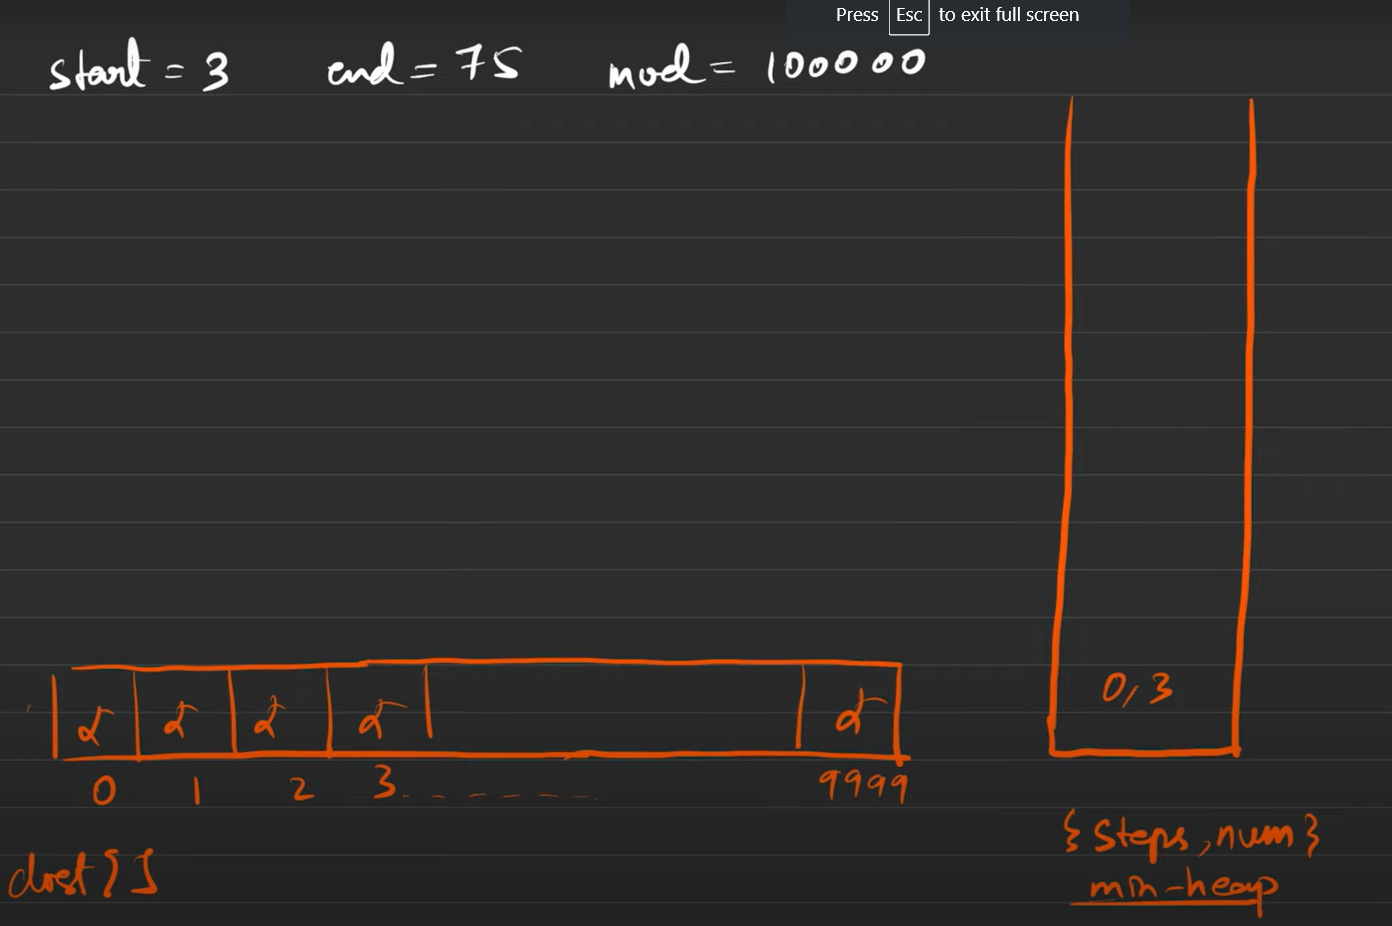

In [35]:
from collections import deque
from typing import List

class Solution:
    
    def minimumMultiplications(self, arr: List[int], start: int, end: int) -> int:
        # Define the modulus value for the operation.
        MOD = 10**5
        # Create a queue for BFS traversal.
        queue = deque()
        
        # Initialize the queue with the start value and the number of steps taken.
        queue.append((start, 0))
        
        # Create a set to keep track of visited states to avoid revisiting.
        visited = set()
        
        # Mark the start state as visited.
        visited.add(start)
        
        # If the start state is already the same as the end state, return 0 steps.
        if start == end:
            return 0
        
        while queue:
            # Dequeue the current state and the number of steps taken to reach it.
            val, d = queue.popleft()
            
            # If the current state matches the end state, return the number of steps.
            if val == end:
                return d
            
            # Explore all possible multiplication operations with the array elements.
            for item in arr:
                new_start = (val * item) % MOD
                
                # If the new state matches the end state, return the number of steps + 1.
                if new_start == end:
                    return d + 1
                
                # If the new state has not been visited before, mark it as visited and enqueue it.
                if new_start not in visited:
                    visited.add(new_start)
                    queue.append((new_start, d + 1))
                    
        # If no valid sequence of operations leads to the end state, return -1.
        return -1


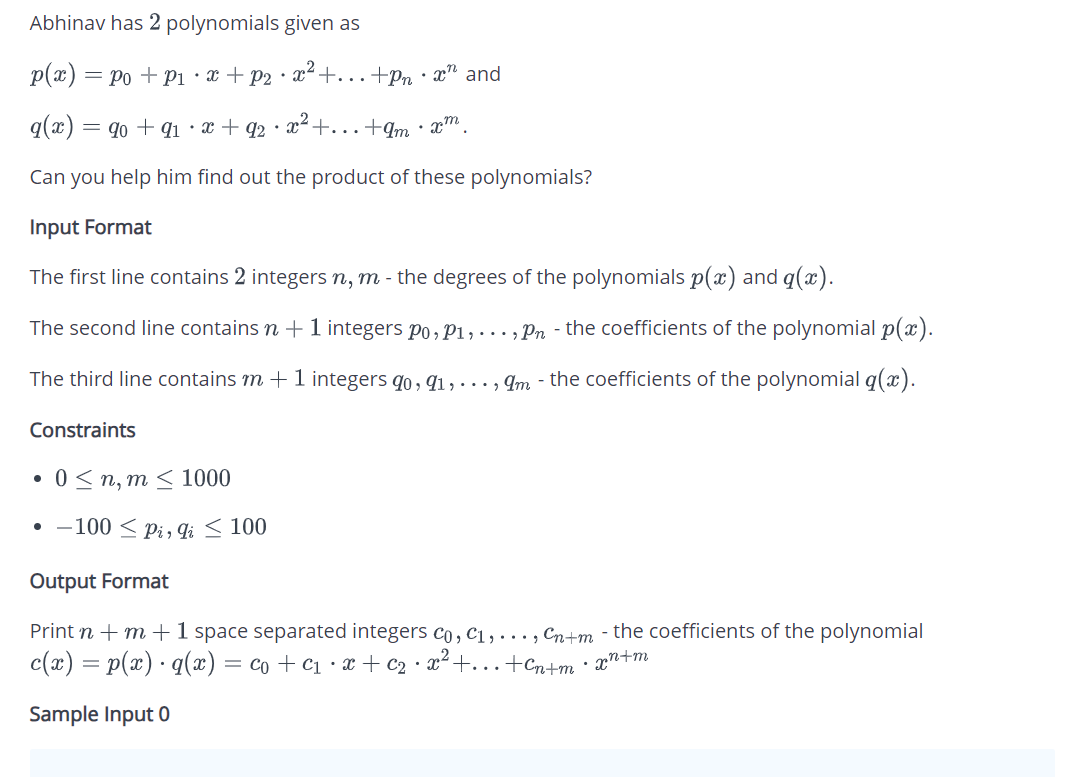

In [133]:
def matprod(arr1, arr2):
    n = len(arr1)
    m = len(arr2)
    
    mat = [[-1 for _ in range(n)] for _ in range(m)]
    
    
    for i in range(m):
        for j in range(n):
            
            mat[i][j] = arr2[i] * arr1[j]
            
            
    rows = len(mat)
    cols = len(mat[0])
    result = []

    for start_col in range(cols):
        diag_sum = 0
        i, j = 0, start_col

        while i < rows and j >= 0:
            diag_sum += mat[i][j]
            i += 1
            j -= 1

        result.append(diag_sum)

    for start_row in range(1, rows):
        diag_sum = 0
        i, j = start_row, cols - 1

        while i < rows and j >= 0:
            diag_sum += mat[i][j]
            i += 1
            j -= 1

        result.append(diag_sum)
    
    result = (" ".join(str(item) for item in result))

    return result
    
if __name__ == "__main__":
    # Read the degrees of the polynomials
    deg1, deg2 = map(int, input().strip().split())

    # Read the coefficients of the first polynomial
    coeff1 = list(map(int, input().strip().split()))

    # Read the coefficients of the second polynomial
    coeff2 = list(map(int, input().strip().split()))

    # Calculate the product polynomial
    product_coeff = matprod(coeff1, coeff2)

    # Print the coefficients of the product polynomial in space-separated format
    print(product_coeff, ' ')

2


ValueError: not enough values to unpack (expected 2, got 1)

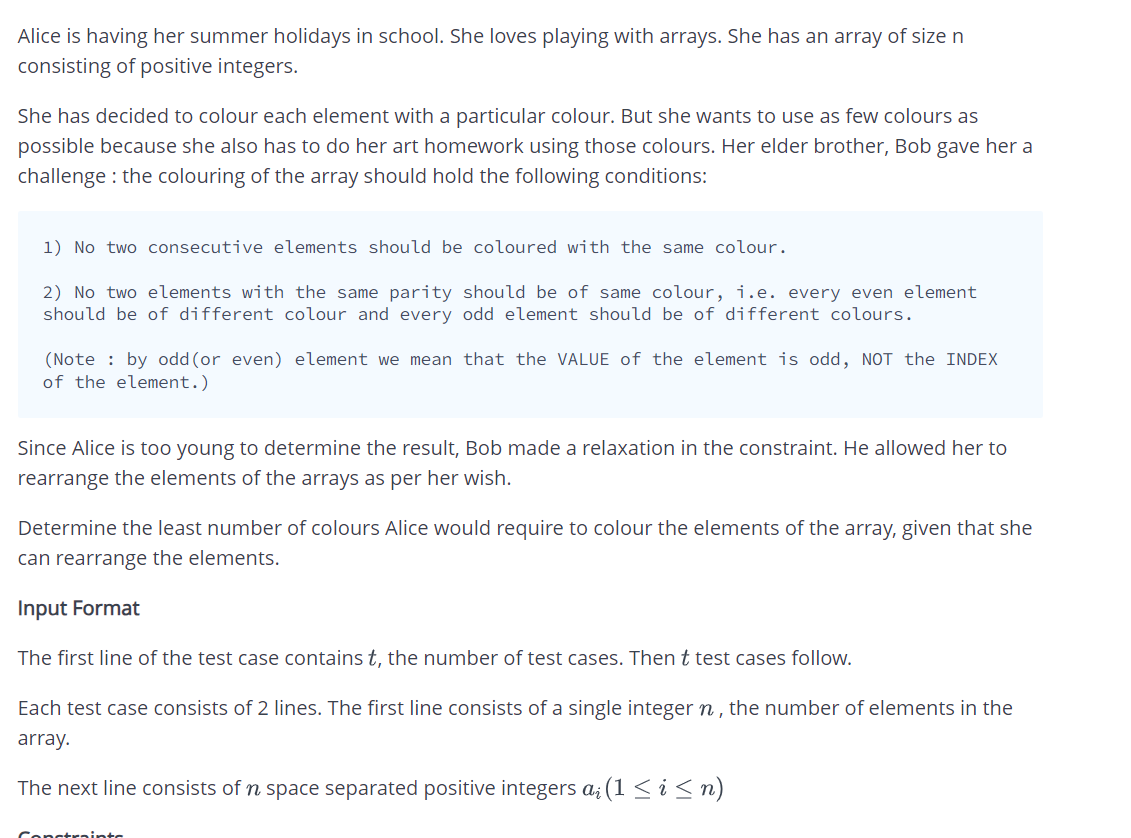

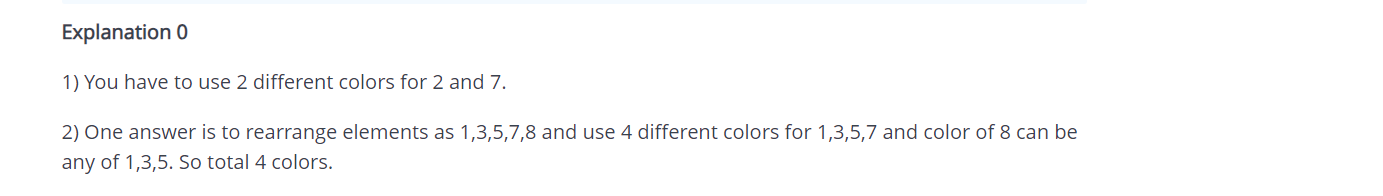

# 

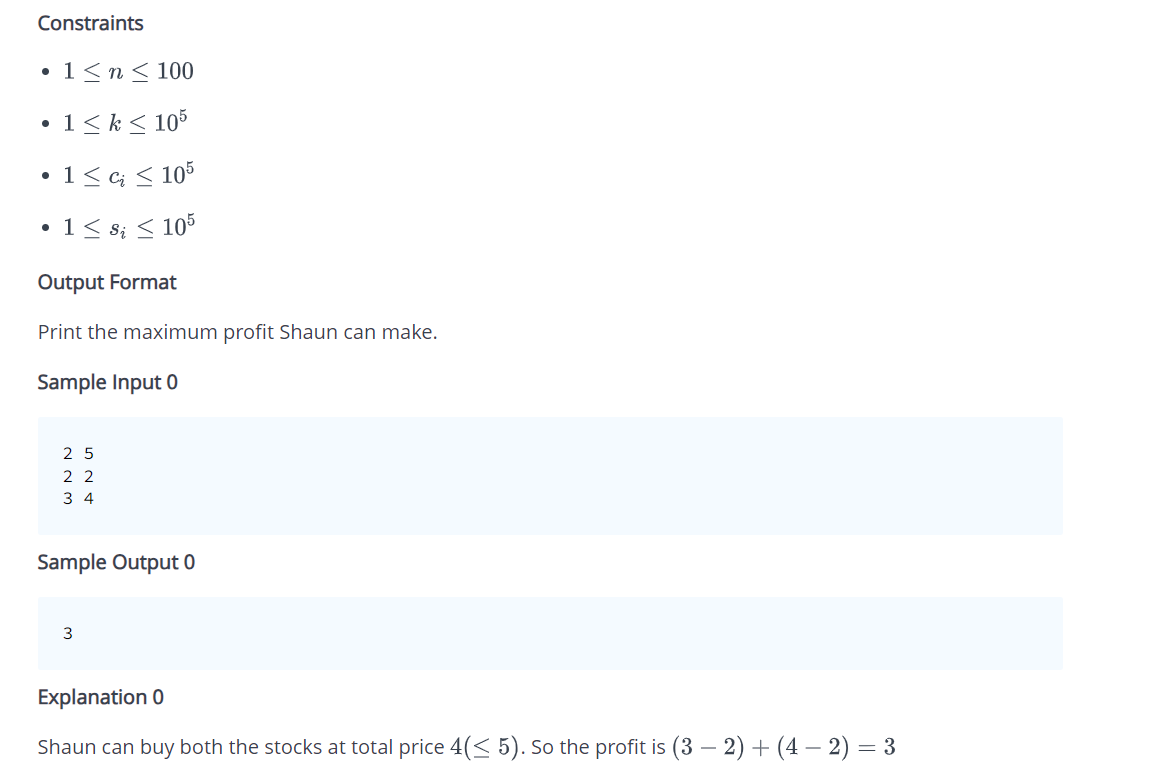

In [196]:
def max_profit(k, cost_prices, sell_prices):
    n = len(cost_prices)
    
    # Create a memoization table to store already computed results
    memo = [[-1 for _ in range(k + 1)] for _ in range(n)]

    def backtrack(idx, remaining_money):
        if idx == n or remaining_money == 0:
            return 0

        # Check if the result for this subproblem is already computed
        if memo[idx][remaining_money] != -1:
            return memo[idx][remaining_money]

        # Calculate the profit without buying the current stock
        profit_without_buying = backtrack(idx + 1, remaining_money)

        # Calculate the profit by buying the current stock if enough money is available
        profit_with_buying = 0
        if cost_prices[idx] <= remaining_money:
            new_remaining_money = remaining_money - cost_prices[idx]
            profit_with_buying = sell_prices[idx] - cost_prices[idx] + backtrack(idx + 1, new_remaining_money)

        # Store the maximum profit in the memoization table
        memo[idx][remaining_money] = max(profit_without_buying, profit_with_buying)

        return memo[idx][remaining_money]

    return backtrack(0, k)

if __name__ == "__main__":
    # Read input from HackerRank
    n, k = map(int, input().strip().split())
    cost_prices = list(map(int, input().strip().split()))
    sell_prices = list(map(int, input().strip().split()))

    # Calculate and print the maximum profit
    result = max_profit(k, cost_prices, sell_prices)
    print(result)


1 2
2
4
2


In [193]:
sell = [1, 1, 5]
cost = [2, 3, 1]
k = 5
findmax(cost, sell, k)

4

# --------------Solved By - Suraj------------------